---

# mplfinance subplots using the "Static Image Method"

---

### Introduction:
* It is possible to "cheat" and place multiple mplfinance plots onto a single figure, by saving the mplfinance plots as images, and using matplotlib's ` imshow() ` feature.
* Here is an example:


    from PIL import Image

    im = Image.open('tight.png')

    import matplotlib.pyplot as plt

    def plotimg(im):
        fig,ax = plt.subplots()
        ax.set_axis_off()
        ax.imshow(im)
        plt.show()

    plotimg(im)




---

## PLEASE NOTE:  This tutorial ASSUMES you have already read:<br><br>&nbsp;&nbsp;&nbsp; [Adding Your Own Technical Studies to Plots](https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb)

---

---
---

## Examples:

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Let's grab 5 months of data from the input data frame:

In [4]:
df = idf.loc['2011-07-01':'2011-12-30',:]

---

#### We can, of course, plot a basic ohlc or candlestick plot:

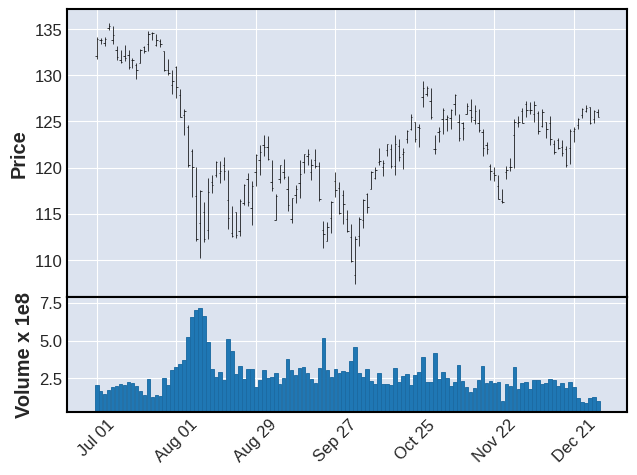

In [5]:
import mplfinance as mpf
mpf.plot(df,volume=True)

In [6]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [7]:
import io
import matplotlib.pyplot as plt
from PIL import Image

# im = Image.open('tight.png')

def plotimg(im):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    ax.imshow(im)
    plt.show()

# plotimg(im)

In [8]:
plots = []
for p in range(4):
    plots.append(io.BytesIO())

In [9]:
stylelist= [
     'blueskies',
     'charles',
     'default',
     'nightclouds',
]

In [10]:
for p,s in enumerate(stylelist):
    mpf.plot(df,volume=True,savefig=plots[p],style=s,figscale=2)

In [11]:
%%capture
fig, ax = plt.subplots(2,2,figsize=(10,8))

In [12]:
axes = [x for sub in ax for x in sub ]

In [13]:
axes

In [14]:
for ix,p in enumerate(plots):
    p.seek(0)
    im = Image.open(p)
    ax = axes[ix]
    ax.set_axis_off()
    ax.imshow(im)

0

0

0

0

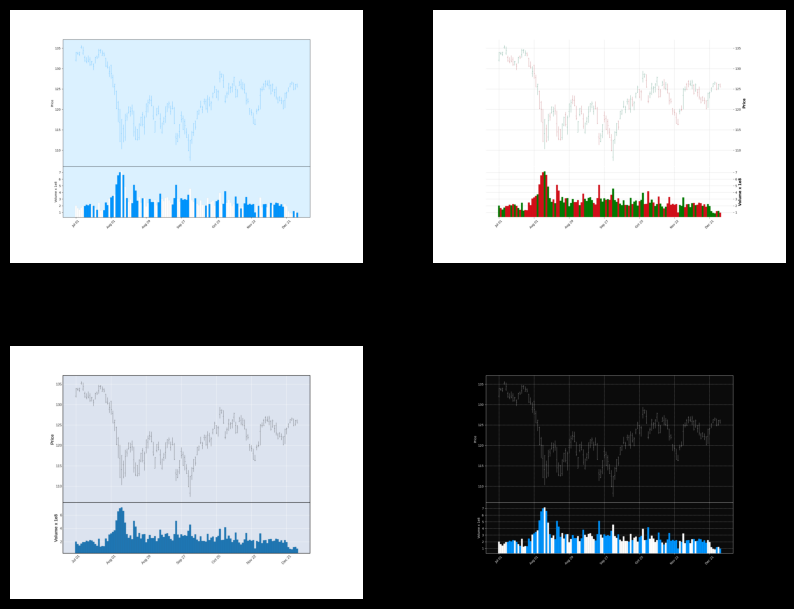

In [15]:
fig